In [274]:
import numpy as np
import matplotlib.pyplot as plt

In [275]:
def gen_x(w, t):
    x = ((w * t) % (2 * np.pi))
    return x

In [276]:
def sample_x(w, Fs, tfinal):
    t = np.arange(0,tfinal,1/Fs)
    xs = [gen_x(w,time) for time in t]
    xs = np.array(xs)
    n = np.arange(t.size)
    return np.column_stack((n, xs))

In [277]:
def plot_x1(xn, s = "plot"):
    plt.plot(xn[:,0],xn[:,1],'o-')
    plt.xlabel('n')
    plt.ylabel('theta[n]')
    plt.title(s)
    plt.show()

In [278]:
def plot_x(x, y, s = "plot"):
    plt.plot(x, y, 'o-')
    plt.xlabel('lambda')
    plt.ylabel('Error')
    plt.title(s)
    plt.show()

In [279]:
def plot_x2(x, y, s = "plot"):
    for i, j in zip(x,y):
        plt.plot([i]*len(j), j,'yo-')
    plt.xlabel('lambda')
    plt.ylabel('Weights')
    plt.title(s)
    plt.show()

In [280]:
def LASSO(xn_train, xn_test, M):
    n_train = [[(i/128)**n for n in range(M+1)] for i in xn_train[:,0]]
    n_test = [[( i/128)**n for n in range(M+1)] for i in xn_test[:,0]]
    
    n_train = np.matrix(np.array(n_train))
    n_test = np.matrix(np.array(n_test))
    
    lamda = []
    l1 = 0
    l = l1
    Error = []
    
    while l==l1 or ((abs(W) < 0.001).sum() < 6):
        
        W = np.matrix(np.random.uniform(-2, 2, M+1)).T
        ind = True
        n = 0.05
        max_itr = 0
        
        while (ind==True or np.linalg.norm(dE) > 0.005) and max_itr < 100000:
            ind = False
            dE1 = (-1 * n_train.T * ((np.matrix(xn_train[:,1]).T) - (n_train * W))) 
            dE = dE1 + (0.5*l*np.sign(W))
            W = W - (n*dE)
            max_itr += 1
            
        lamda.append(l)
        Error.append(0.5*((np.linalg.norm(np.matrix(xn_test[:,1]).T - (n_test*W)))**2))
    
        if l==l1:
            Weights = W.T
        else:
            Weights = np.append(Weights, W.T, axis=0)
            
        l+=0.002

    plot_x(lamda, Error, s="LASSO; M=10")
    plot_x2(lamda, np.array(Weights), s="LASSO; M=10")

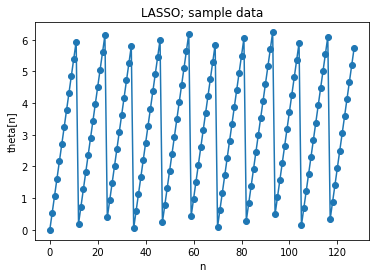

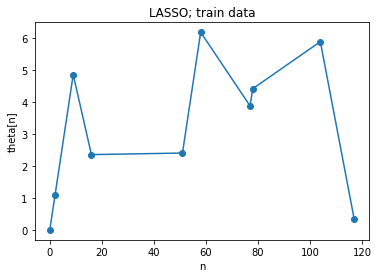

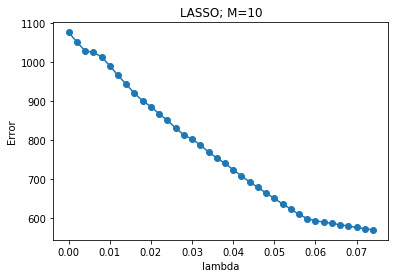

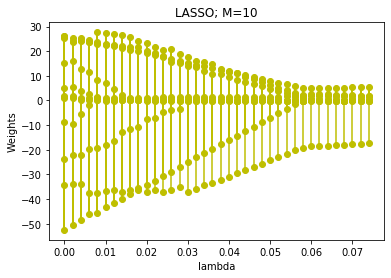

In [281]:
if __name__=="__main__":
    xn = sample_x(2*np.pi*11, 128, 1)
    plot_x1(xn, s="LASSO; sample data")
    np.random.seed(11)
    np.random.shuffle(xn)
    xn_train = xn[0:10]
    xn_test = xn[10:]
    xn_train = xn_train[xn_train[:,0].argsort()]
    xn_test = xn_test[xn_test[:,0].argsort()]
    plot_x1(xn_train, s="LASSO; train data")
    LASSO(xn_train, xn_test, 10)